In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
%matplotlib inline

sns.set()
#sns.set(rc={'figure.figsize':(10,6.5)})
sns.set_context("notebook", font_scale=1.5)
sns.set_style('white')
from IPython.display import set_matplotlib_formats

set_matplotlib_formats('png')

In [2]:
d = pd.read_csv('choroba_srodmiazszowa.csv')
d['TLC zmiana'] = d['TLC 1r'] - d['TLC w']
d['FVC zmiana'] = d['FVC1r'] - d['FVCw']
d['DLCO zmiana'] = d['DLCO1r'] - d['DLCOw']
d['mRSS zmiana'] = d['mRSS1r'] - d['mRSSw']

tlc_zmiana = 'zmiana TLC po roku (%)'
dlco_zmiana = 'zmiana DLCO po roku (%)'
fvc_zmiana = 'zmiana FVC po roku (%)'
mrss_zmiana = 'zmiana mRSS po roku'
dawka_sumacyjna = 'dawka sumacyjna Cs (g)'

d = d.rename(columns={
    'TLC zmiana': tlc_zmiana,
    'FVC zmiana': fvc_zmiana,
    'DLCO zmiana': dlco_zmiana,
    'mRSS zmiana': mrss_zmiana,
    'dawka sumacyjna': dawka_sumacyjna,
})

male = d.loc[d['płeć'] == 'm']
female = d.loc[d['płeć'] == 'k']

In [3]:
d.columns

Index(['wiek', 'płeć', 'BMI', 'czas od diagnozy (lata)', 'palenie obecnie',
       'palenie w przeszłości', 'niepalacz', 'zaburzenia motoryki przełyku',
       'nadciśnienie płucne (tak/nie)', 'dawka sumacyjna Cs (g)', 'TLC w',
       'TLC 1r', 'FVCw', 'FVC1r', 'DLCOw', 'DLCO1r', 'mRSSw', 'mRSS1r',
       'Unnamed: 18', 'duszność w', 'duszność 1r', 'HRCT>20%w', 'HRCT<10%w',
       'HRCT10-20%w', 'HRCT1rok(regresja/stabilnie/progresja)', 'Scl-70 (+/-)',
       'trzeszczenia w', 'kaszel w', 'kaszel 1r', 'wczesniejsze leczenie',
       'zmiana TLC po roku (%)', 'zmiana FVC po roku (%)',
       'zmiana DLCO po roku (%)', 'zmiana mRSS po roku'],
      dtype='object')

In [4]:
# TLC

Text(0.5, 1.0, 'grupa badana')

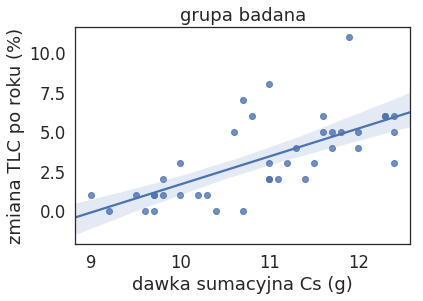

In [5]:
sns.regplot(x=dawka_sumacyjna, y=tlc_zmiana, data=d).set_title('grupa badana')

Text(0.5, 1.0, 'kobiety')

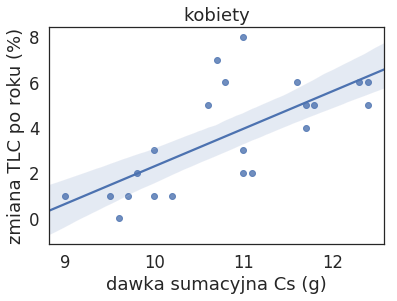

In [6]:
#female.plot.scatter('dawka sumacyjna', 'TLC zmiana')
sns.regplot(x=dawka_sumacyjna, y=tlc_zmiana, data=female).set_title('kobiety')

Text(0.5, 1.0, 'mężczyźni')

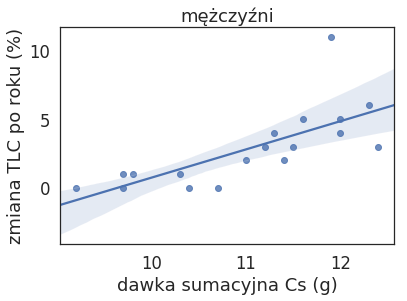

In [7]:
sns.regplot(x=dawka_sumacyjna, y=tlc_zmiana, data=male).set_title('mężczyźni')

Text(0.5, 1.0, 'grupa badana')

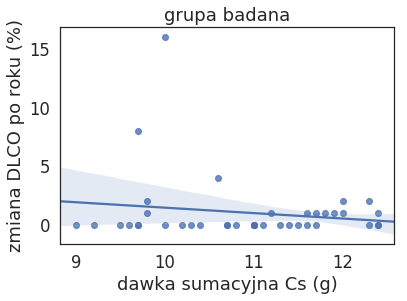

In [8]:
# DLCO (Fig. 1)
sns.regplot(x=dawka_sumacyjna, y=dlco_zmiana, data=d).set_title('grupa badana')

Text(0.5, 1.0, 'kobiety')

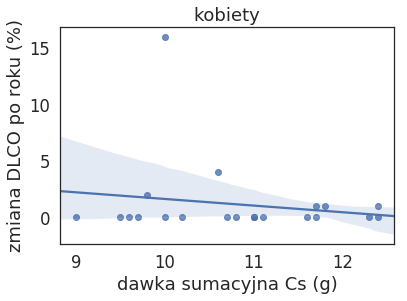

In [9]:
sns.regplot(x=dawka_sumacyjna, y=dlco_zmiana, data=female).set_title('kobiety')

Text(0.5, 1.0, 'mężczyźni')

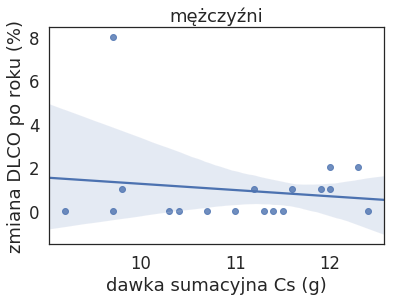

In [10]:
sns.regplot(x=dawka_sumacyjna, y=dlco_zmiana, data=male).set_title('mężczyźni')

Text(0.5, 1.0, 'grupa badana')

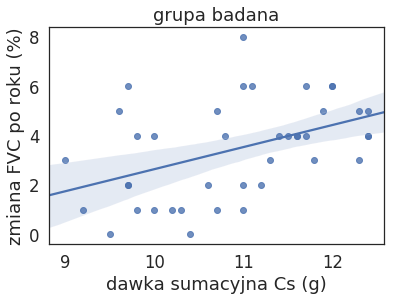

In [11]:
#FVC
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=d).set_title('grupa badana')

Text(0.5, 1.0, 'kobiety')

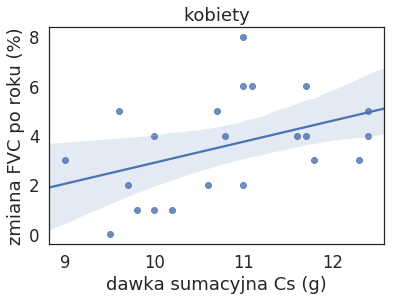

In [12]:
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=female).set_title('kobiety')

Text(0.5, 1.0, 'mężczyźni')

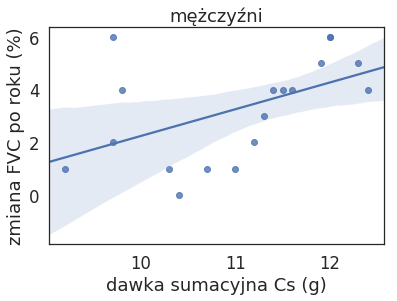

In [39]:
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=male).set_title('mężczyźni')

Text(0.5, 1.0, 'grupa badana')

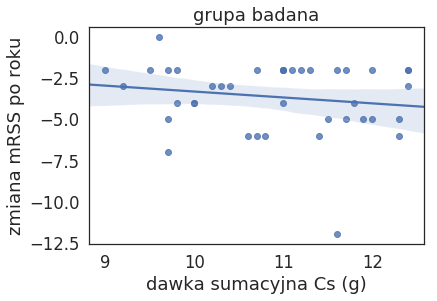

In [14]:
#mRSS TODO Fig. 2 powinien mieć linie regresji dla obu płci osobno naniesione
sns.regplot(x=dawka_sumacyjna, y=mrss_zmiana, data=d).set_title('grupa badana')

Text(0.5, 1.0, 'kobiety')

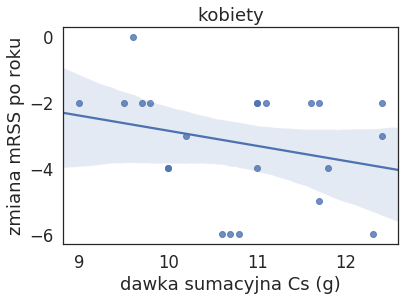

In [15]:
sns.regplot(x=dawka_sumacyjna, y=mrss_zmiana, data=female).set_title('kobiety')

Text(0.5, 1.0, 'mężczyźni')

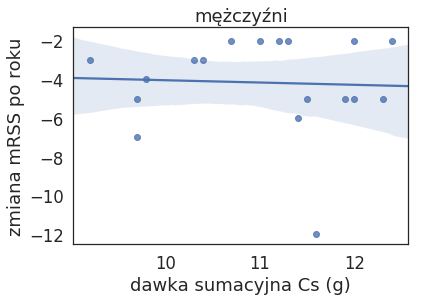

In [16]:
sns.regplot(x=dawka_sumacyjna, y=mrss_zmiana, data=male).set_title('mężczyźni')

In [17]:
# duszność i kaszel

In [18]:
len(d.loc[d['duszność w'] == 'tak'])

17

In [19]:
len(d.loc[d['duszność 1r'] == 'tak'])

5

In [20]:
len(d.loc[d['kaszel w'] == 'tak'])

27

In [21]:
len(d.loc[d['kaszel 1r'] == 'tak'])

8

In [22]:
len(female.loc[d['zaburzenia motoryki przełyku'] == 'tak'])

9

In [23]:
len(male.loc[d['zaburzenia motoryki przełyku'] == 'tak'])

7

In [24]:
# czas od diagnozy
male['czas od diagnozy (lata)'].mean()

1.9444444444444444

In [25]:
female['czas od diagnozy (lata)'].mean()

1.9545454545454546

In [26]:
d['czas od diagnozy (lata)'].mean()

1.95

Text(0.5, 1.0, 'objawy choroby refluksowej')

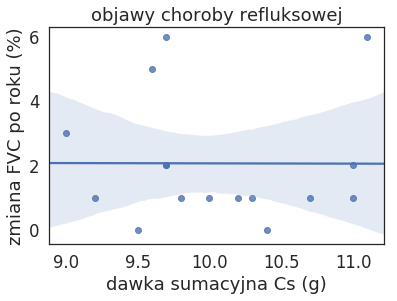

In [27]:
reflux = d.loc[d['zaburzenia motoryki przełyku'] == 'tak']
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=reflux).set_title('objawy choroby refluksowej')

Text(0.5, 1.0, 'objawy choroby refluksowej (M)')

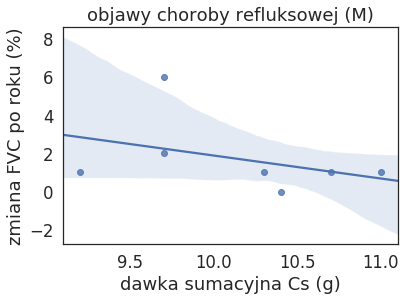

In [28]:
male_reflux = male.loc[d['zaburzenia motoryki przełyku'] == 'tak']
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=male_reflux).set_title('objawy choroby refluksowej (M)')

Text(0.5, 1.0, 'objawy choroby refluksowej (K)')

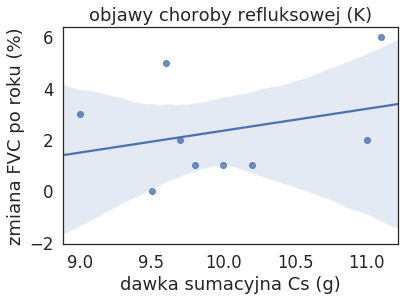

In [29]:
female_reflux = female.loc[d['zaburzenia motoryki przełyku'] == 'tak']
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=female_reflux).set_title('objawy choroby refluksowej (K)')

Text(0.5, 1.0, 'grupa badana')

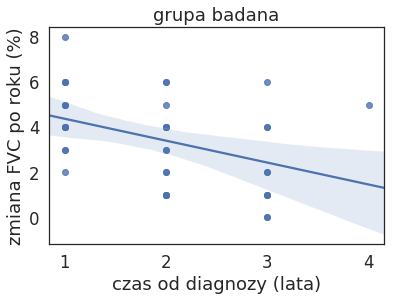

In [30]:
# Fig. 3
sns.regplot(x='czas od diagnozy (lata)', y=fvc_zmiana, data=d).set_title('grupa badana')

In [31]:
d.columns

Index(['wiek', 'płeć', 'BMI', 'czas od diagnozy (lata)', 'palenie obecnie',
       'palenie w przeszłości', 'niepalacz', 'zaburzenia motoryki przełyku',
       'nadciśnienie płucne (tak/nie)', 'dawka sumacyjna Cs (g)', 'TLC w',
       'TLC 1r', 'FVCw', 'FVC1r', 'DLCOw', 'DLCO1r', 'mRSSw', 'mRSS1r',
       'Unnamed: 18', 'duszność w', 'duszność 1r', 'HRCT>20%w', 'HRCT<10%w',
       'HRCT10-20%w', 'HRCT1rok(regresja/stabilnie/progresja)', 'Scl-70 (+/-)',
       'trzeszczenia w', 'kaszel w', 'kaszel 1r', 'wczesniejsze leczenie',
       'zmiana TLC po roku (%)', 'zmiana FVC po roku (%)',
       'zmiana DLCO po roku (%)', 'zmiana mRSS po roku'],
      dtype='object')

In [42]:
# TODO Table 2 (ale jako wykres)
# correlation between cumulative CYC (Cs) dose
# and difference found in vital capacity or total lung capacity before administration of the first dose of CYC
# and after 12 months of medication

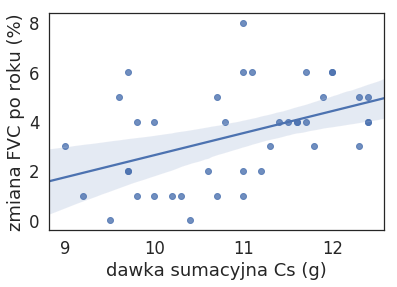

In [47]:
sns.regplot(x=dawka_sumacyjna, y=fvc_zmiana, data=d)

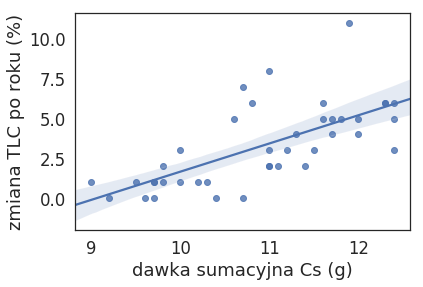

In [46]:
sns.regplot(x=dawka_sumacyjna, y=tlc_zmiana, data=d)